datetime objects with python

In [1]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../week03/data/train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

datetime is viewed as a string (dtype: object), we need to parse this, there are a few ways

In [5]:
# parsing the index to datetime
df = pd.read_csv('../week03/data/train.csv', index_col=0, parse_dates=True)
# parsing some column to datetime
df = pd.read_csv('../week03/data/train.csv', parse_dates=[0])
# parsing it later
df = pd.read_csv('../week03/data/train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

df = pd.read_csv('../week03/data/train.csv', index_col=0, parse_dates=True) #df.index here

these are the features of the model below, the `dt` is referring to the `datetime` objects, as `str` would refer to `string` objects in a column with strings

In [6]:
#you have a bunch of options to call more specific dates
df['datetime'].dt.day_of_week
df['datetime'].dt.dayofyear
df['datetime'].dt.day
df['datetime'].dt.hour
df['datetime'].dt.month
df['datetime'].dt.day_name()
#df['datetime'].dt.isocaldner().week # 1-52

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime, Length: 10886, dtype: object

In [7]:
df['day']= df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.day_of_week

my_birthday = '20.06.1985 08:00'
my_birthday_us = '06/20/85 8.00 PM'

my_datetime_birthday = datetime.strptime(my_birthday, '%d.%m.%Y %H:%M')

my_datetime_birthday

my_datetime_birthday.strftime('%m/%d/%y %-I.%M')

In [8]:
#df.set_index('datetime', drop=True, inplace=True)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,5


resample is only possible with datetimes, but it lets you aggregate the data based on a time (y-m-d or h-m-s depending on how large or granular you are trying to get to)

df.resample('M').mean();

#forward fill repeats the entry from the first known entry to the next one, and backwards for bfill, repeats from the next known entry to the first one
df.resample('min').ffill() #this is a forward fill, also a bfill

#rolling takes the number and makes that number of entries the mean, so rolling 3 means first 2 entries become the mean for the 3rd, then the rest are the average of that row and the 4th for a moving average, this is good for stock or other things like that
df.rolling(1).mean().plot(y='count')

In [9]:
#no null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
hour          0
month         0
dayofweek     0
dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

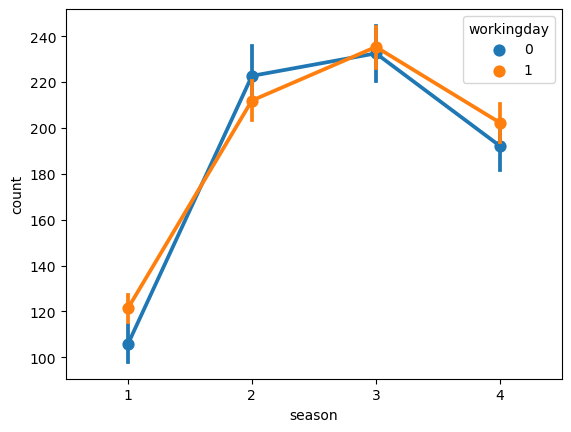

In [10]:
sns.pointplot(df, x="season", y="count", hue = 'workingday')
plt.xticks()

<Axes: xlabel='holiday', ylabel='count'>

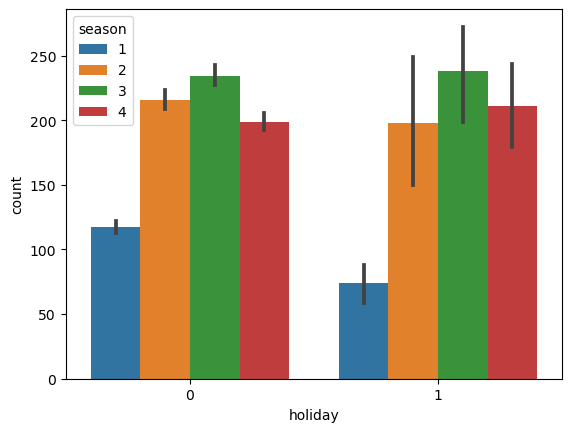

In [11]:
#this shows taht roughly, no holiday (0) are more similar than I would have guessed
sns.barplot(data=df,x='holiday',y='count',hue='season')


<Axes: xlabel='workingday', ylabel='count'>

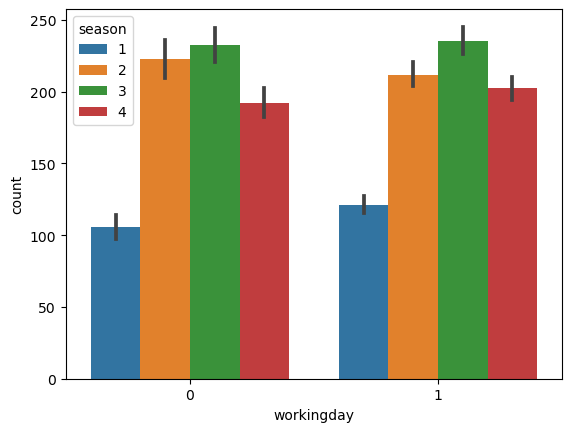

In [12]:
#4 really should be just dropped imo
sns.barplot(data=df,x='workingday',y='count',hue='season')


<Axes: >

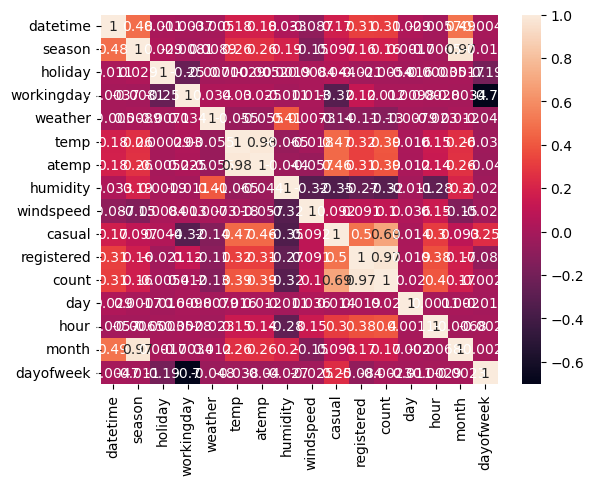

In [13]:
corr = df.corr()
sns.heatmap(corr, annot=True)

<Axes: >

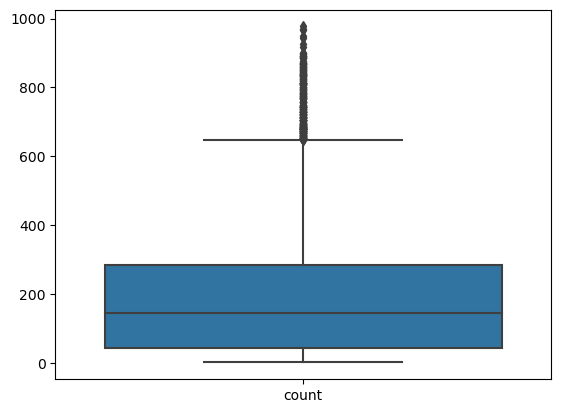

In [14]:
#this is a lot of outliers
sns.boxplot(df[['count']])

<Axes: >

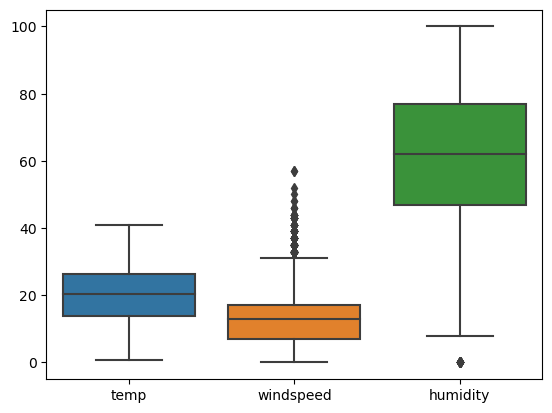

In [15]:
sns.boxplot(data=df[['temp','windspeed','humidity']])

In [16]:
#date time is still fucking me up, will spend some more time on it this week

In [17]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,19,12,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,20,12,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,21,12,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,19,22,12,2


<Axes: xlabel='hour', ylabel='count'>

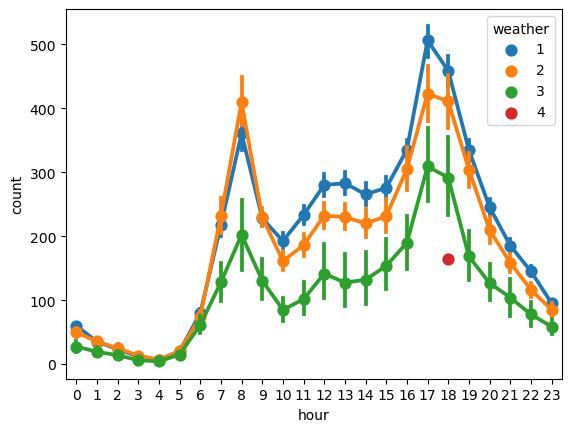

In [18]:
sns.pointplot(data=df, x='hour', y='count', hue='weather')
#this one actually looks like something.

<Axes: xlabel='month', ylabel='count'>

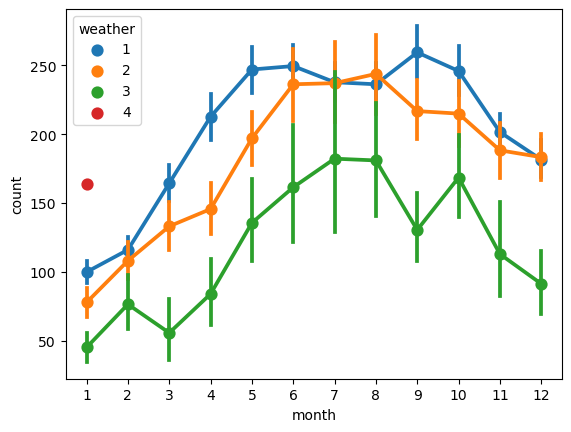

In [19]:
sns.pointplot(data=df, x='month', y='count', hue='weather') # so in general 

<Axes: xlabel='hour', ylabel='registered'>

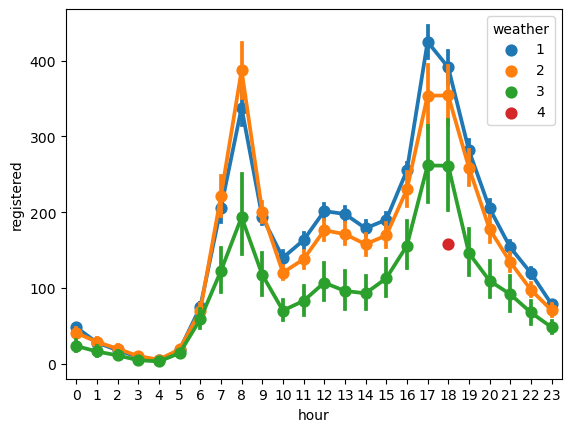

In [20]:
#there is a very clear spiking around 7-9 and from 17 -20ish for registered users
sns.pointplot(data=df, x='hour', y='registered', hue='weather') 

<Axes: xlabel='month', ylabel='casual'>

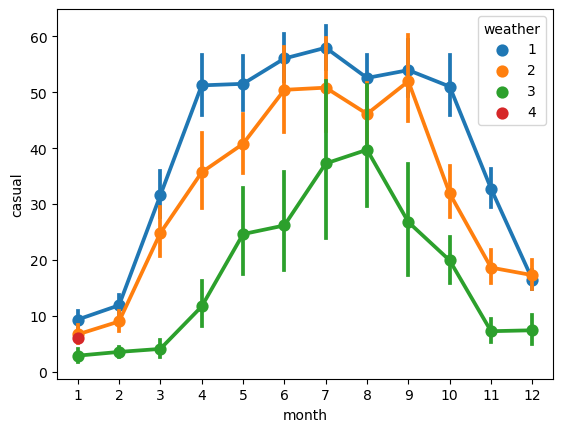

In [21]:
#casuals liking the warmer months is probably not a super surprise
sns.pointplot(data=df, x='month', y='casual', hue='weather')

<Axes: xlabel='day', ylabel='registered'>

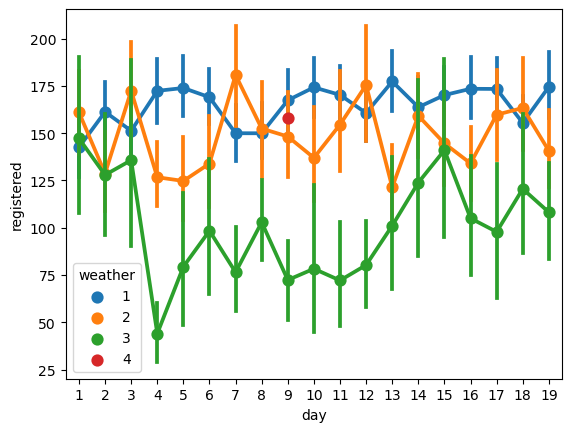

In [22]:
sns.pointplot(data=df, x='day', y='registered', hue='weather')

<Axes: xlabel='month', ylabel='count'>

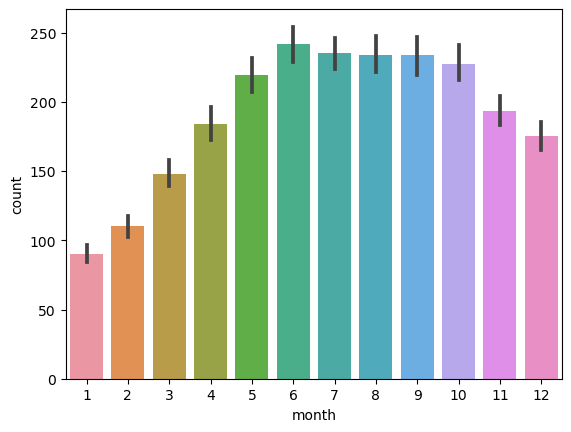

In [23]:
#shocker, the warmer months overall have higher counts, though the drop from dec to jan is a bit stark
sns.barplot(data=df, x='month', y='count',)

<Axes: xlabel='hour', ylabel='casual'>

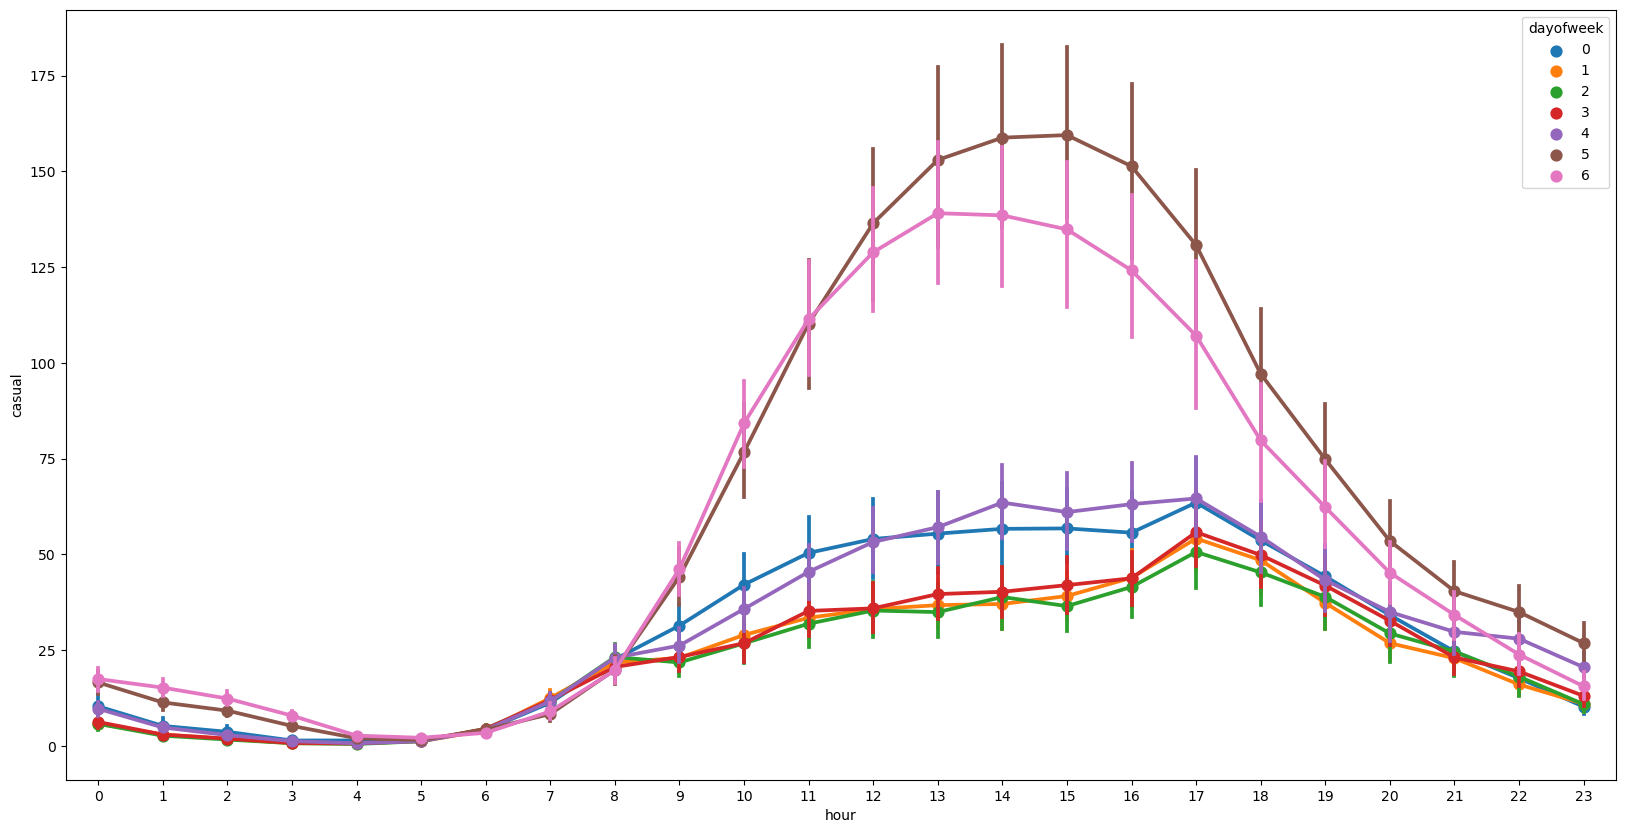

In [24]:
plt.subplots(figsize = (20,10))
sns.pointplot(data=df, x='hour', y='casual', hue='dayofweek')

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,month,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4,1,5


<Axes: xlabel='month', ylabel='temp'>

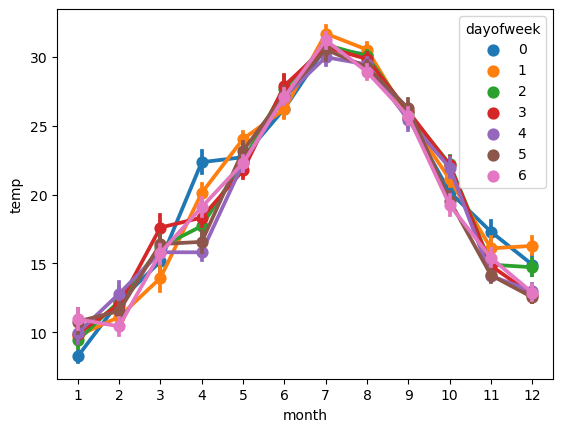

In [26]:
sns.pointplot(data=df, x='month', y='temp', hue='dayofweek')

<Axes: xlabel='humidity', ylabel='count'>

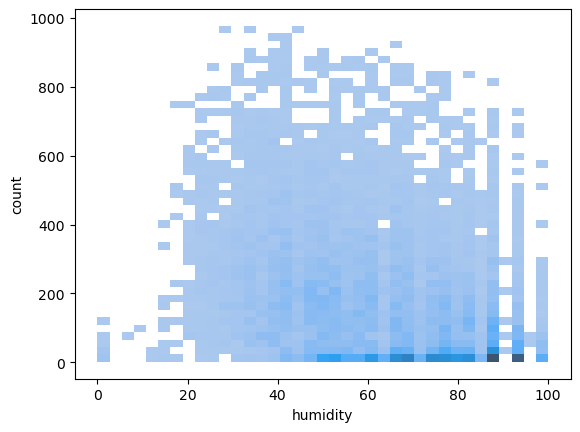

In [27]:
#does this suggest there is actually a mildly negative relationship between humidity and people going biking?
sns.histplot(data=df, x='humidity', y='count')

<Axes: xlabel='windspeed', ylabel='count'>

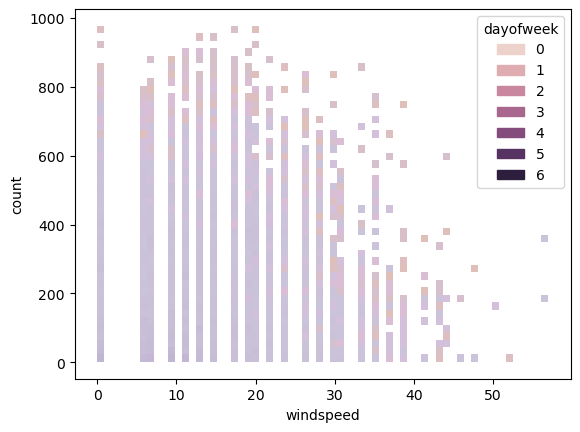

In [28]:
#windspeed might be useless? I really can't tell
sns.histplot(data=df, x='windspeed', y='count', hue="dayofweek")

<Axes: xlabel='hour', ylabel='registered'>

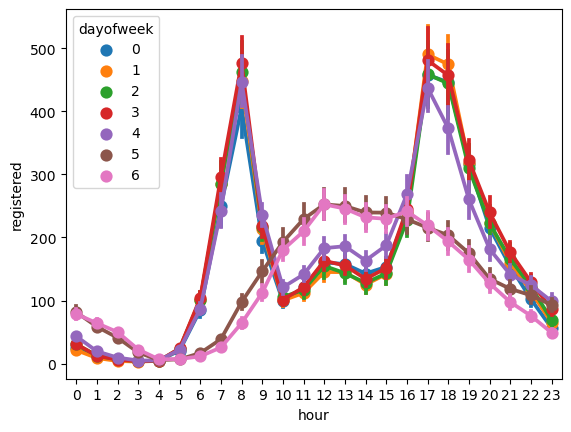

In [29]:
sns.pointplot(data=df, x='hour', y='registered', hue='dayofweek')